In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("hw4_data.csv")
data.drop(data.columns[[0]], axis=1,inplace=True)
data

,BOS,NYC,DC,MIA,CHI,SEA,SF,LA,DEN
0,0,206,429,1504,963,2976,3095,2979,1949
1,206,0,233,1308,802,2815,2934,2786,1771
2,429,233,0,1075,671,2684,2799,2631,1616
3,1504,1308,1075,0,1329,3273,3053,2687,2037
4,963,802,671,1329,0,2013,2142,2054,996
5,2976,2815,2684,3273,2013,0,808,1131,1307
6,3095,2934,2799,3053,2142,808,0,379,1235
7,2979,2786,2631,2687,2054,1131,379,0,1059
8,1949,1771,1616,2037,996,1307,1235,1059,0


In [8]:
city_list = data.columns.values.tolist()
for i in range(len(city_list)):
    city_list[i] = city_list[i].strip()

city_list

['BOS', 'NYC', 'DC', 'MIA', 'CHI', 'SEA', 'SF', 'LA', 'DEN']

In [9]:
one_mat = np.zeros((9,9)) + 1
H_mat = np.eye(9) - one_mat/9
H_mat

array([[ 0.88888889, -0.11111111, -0.11111111, -0.11111111, -0.11111111,
        -0.11111111, -0.11111111, -0.11111111, -0.11111111],
       [-0.11111111,  0.88888889, -0.11111111, -0.11111111, -0.11111111,
        -0.11111111, -0.11111111, -0.11111111, -0.11111111],
       [-0.11111111, -0.11111111,  0.88888889, -0.11111111, -0.11111111,
        -0.11111111, -0.11111111, -0.11111111, -0.11111111],
       [-0.11111111, -0.11111111, -0.11111111,  0.88888889, -0.11111111,
        -0.11111111, -0.11111111, -0.11111111, -0.11111111],
       [-0.11111111, -0.11111111, -0.11111111, -0.11111111,  0.88888889,
        -0.11111111, -0.11111111, -0.11111111, -0.11111111],
       [-0.11111111, -0.11111111, -0.11111111, -0.11111111, -0.11111111,
         0.88888889, -0.11111111, -0.11111111, -0.11111111],
       [-0.11111111, -0.11111111, -0.11111111, -0.11111111, -0.11111111,
        -0.11111111,  0.88888889, -0.11111111, -0.11111111],
       [-0.11111111, -0.11111111, -0.11111111, -0.11111111, -0

In [10]:
data_mat = np.square(np.array(data))
B_mat = -0.5*np.matmul(np.matmul(H_mat.T, data_mat),H_mat)
B_mat

array([[ 2058374.34567901,  1779217.79012346,  1515885.2345679 ,
         1136972.84567901,   656568.45679012, -1932962.32098765,
        -2301805.93209877, -2211231.65432099,  -701018.7654321 ],
       [ 1779217.79012346,  1542497.2345679 ,  1322822.67901235,
         1154610.29012346,   540712.40123457, -1724725.37654321,
        -2074409.98765432, -1912847.70987654,  -627877.32098765],
       [ 1515885.2345679 ,  1322822.67901235,  1157437.12345679,
         1239699.7345679 ,   444663.84567901, -1557070.93209877,
        -1879962.54320988, -1685560.2654321 ,  -557914.87654321],
       [ 1136972.84567901,  1154610.29012346,  1239699.7345679 ,
         2477587.34567901,   446738.95679012, -2651332.32098765,
        -1963091.43209877, -1174389.15432099,  -666796.2654321 ],
       [  656568.45679012,   540712.40123457,   444663.84567901,
          446738.95679012,   182131.56790123,  -468880.20987654,
         -744496.82098765,  -821590.54320988,  -235847.65432099],
       [-1932962.320

In [11]:
eigenvalue, featurevector = np.linalg.eig(B_mat)
featurevector

array([[ 0.36109486,  0.31721813,  0.17974193, -0.46896639, -0.28379668,
        -0.4358173 , -0.1099768 , -0.35080372,  0.33333333],
       [ 0.32098869,  0.21029868, -0.02532664, -0.18471798,  0.00939789,
         0.19408103,  0.45462149,  0.68002278,  0.33333333],
       [ 0.28835403,  0.09359572, -0.30958397,  0.23468125,  0.27726932,
         0.39704703,  0.27705271, -0.57860206,  0.33333333],
       [ 0.32850283, -0.69537389,  0.46256136,  0.27152993, -0.07983907,
        -0.03851583, -0.03620323,  0.02387459,  0.33333333],
       [ 0.11471526,  0.11978205, -0.49895737,  0.4242057 , -0.24916266,
        -0.12195624, -0.54403322,  0.24401871,  0.33333333],
       [-0.42735856,  0.43858078,  0.4512496 ,  0.48201059,  0.08109916,
        -0.20092174,  0.17571701, -0.01081426,  0.33333333],
       [-0.45441892, -0.09033973,  0.04646928, -0.25259793, -0.54289287,
         0.54825175, -0.06668441, -0.09223069,  0.33333333],
       [-0.39198655, -0.38457192, -0.43203669, -0.17256131,  0

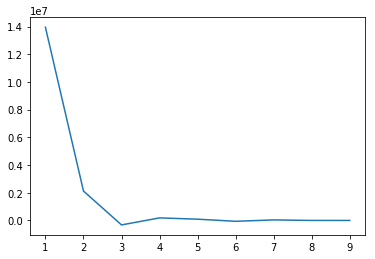

In [12]:
index = [i for i in range(1, 10)]
plt.plot(index, eigenvalue)
plt.show()

In [13]:
result = np.dot(featurevector[:,:2],np.diag(np.sqrt(eigenvalue[:2])))
result

array([[ 1348.66832958,   462.40059815],
       [ 1198.87410815,   306.54690023],
       [ 1076.9855404 ,   136.43203542],
       [ 1226.939011  , -1013.62838367],
       [  428.45483272,   174.60316481],
       [-1596.15940184,   639.30776896],
       [-1697.22828136,  -131.68586278],
       [-1464.04701004,  -560.5804599 ],
       [ -522.4871286 ,   -13.39576123]])

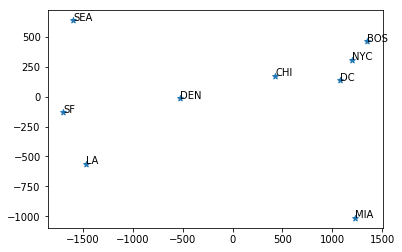

In [14]:
plt.scatter(result[:, 0], result[:, 1], marker = '*')
for i, word in enumerate(city_list):
    plt.annotate(word,(result[:, 0][i], result[:, 1][i]))